In [2]:
import tensorflow

In [10]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Code below is inspired and comes from:

**[Machine Learning Mastery by Jason Brownlee](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)**

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


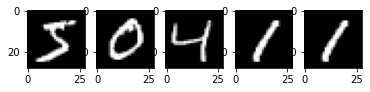

In [6]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

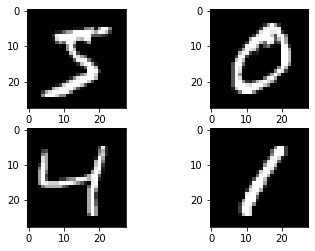

In [7]:
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [8]:
X_train.shape

(60000, 28, 28)

In [18]:
# pip install keras==2.3.1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()

# model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30


Using CPU, it takes ~6 seconds per epoch, using GPU, it takes ~2 seconds per epoch on this simple neural network exercise.

In [ ]:
# Save whole model for download
model.save("model.h5")

In [2]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
     |████████████████████████████████| 173.9 MB 60.7 MB/s eta 0:00:01   |████▏                           | 22.6 MB 9.8 MB/s eta 0:00:16     |█████▌                          | 29.6 MB 7.9 MB/s eta 0:00:19     |█████████                       | 48.9 MB 6.7 MB/s eta 0:00:19     |█████████▎                      | 50.3 MB 6.7 MB/s eta 0:00:19     |██████████                      | 53.9 MB 6.7 MB/s eta 0:00:18            | 64.4 MB 36.7 MB/s eta 0:00:03�█▋         | 122.9 MB 12.1 MB/s eta 0:00:05     |███████████████████████████████ | 168.4 MB 68.6 MB/s eta 0:00:01
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 3.3 MB 21.9 MB/s eta 0:00:01
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl 

In [5]:
!tensorflowjs_converter --input_format keras '/Users/lizaveta.kuryla/notebooks/model.h5' '/Users/lizaveta.kuryla/notebooks/model'